In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.shape

(30, 3)

In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
df.skew(numeric_only=True)

Unnamed: 0         0.00000
YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [8]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

0.37956024064804234


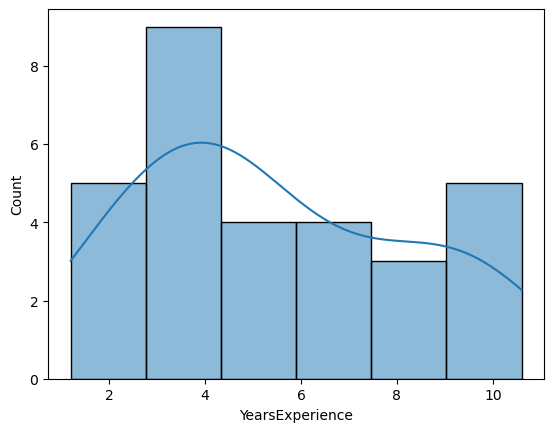

In [9]:
sns.histplot(x='YearsExperience',data=df,kde=True)
print(df['YearsExperience'].skew())

0.35411967922959153


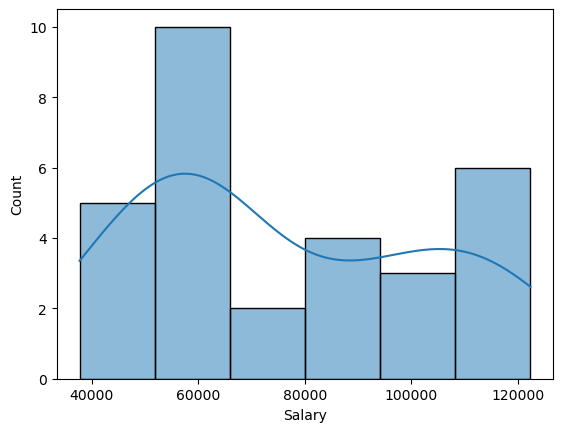

In [10]:
sns.histplot(x='Salary',data=df,kde=True)
print(df['Salary'].skew())

In [11]:
display(df.corr(numeric_only=True))

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [12]:
model = LinearRegression()
model.fit(df[['YearsExperience']], df['Salary'])

LinearRegression()

In [13]:
predicted_salary_8yrs = model.predict(pd.DataFrame({'YearsExperience': [8]}))[0]
print(f"Predicted Salary for 8 years experience: ₹{predicted_salary_8yrs:,.2f}")

Predicted Salary for 8 years experience: ₹100,447.90


In [14]:
print(f"Fixed Salary (0 years experience): ₹{model.intercept_:,.2f}")

Fixed Salary (0 years experience): ₹24,848.20


In [17]:
pred=model.predict(df[['YearsExperience']])
r2=r2_score(df['Salary'],pred)
print(r2)

0.9569566641435086


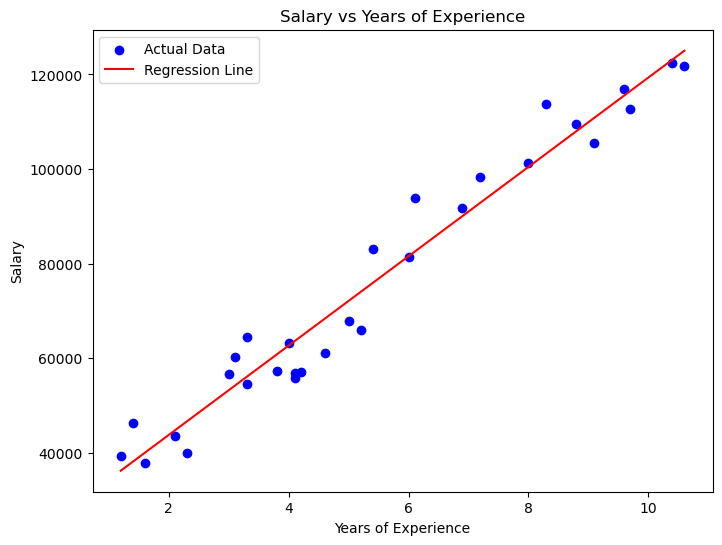

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df[['YearsExperience']], df['Salary'], color='blue', label='Actual Data')
plt.plot(df[['YearsExperience']], model.predict(df[['YearsExperience']]), color='red', label='Regression Line')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
